In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os 

In [2]:
# class look-up table 
classes = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

In [3]:
curr = os.getcwd()
train_path = os.path.join(curr, 'data/train/images/')
test_path = os.path.join(curr, 'data/test/images/')
trlabel_path = os.path.join(curr, 'data/train/labels/')
tslabel_path = os.path.join(curr, 'data/test/labels/')

elbow positive


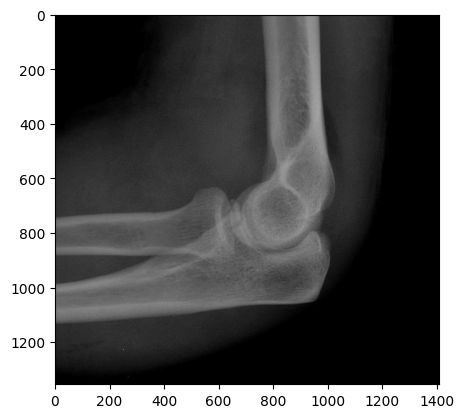

In [5]:
# display xray & class
for file in sorted(os.listdir(train_path)):
    image_path = os.path.join(train_path, file)
    image = Image.open(image_path)
    plt.imshow(image)
    break
    
for file in sorted(os.listdir(trlabel_path)):    
    label_path = os.path.join(trlabel_path, file)
    with open(label_path, 'r') as label:
        _class = label.read()[0]
        print(classes[int(_class)])
    break

In [6]:
# image properties
img_array = np.array(image)
print(f"Image Mode: {image.mode}")
print(f"Image Shape: {img_array.shape}")

Image Mode: RGB
Image Shape: (1355, 1409, 3)


In [7]:
print(f" Train Samples: {len(os.listdir(train_path))}")
print(f" Test Samples: {len(os.listdir(test_path))}")

 Train Samples: 348
 Test Samples: 169


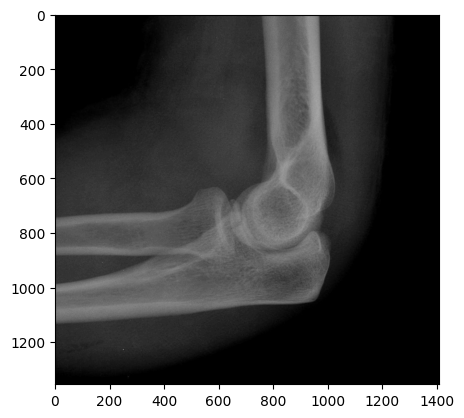

In [8]:
bw_img = image.convert('L')
plt.imshow(bw_img, cmap='gray')

In [9]:
bw_imgarr = np.array(bw_img)
bw_imgarr.shape

(1355, 1409)

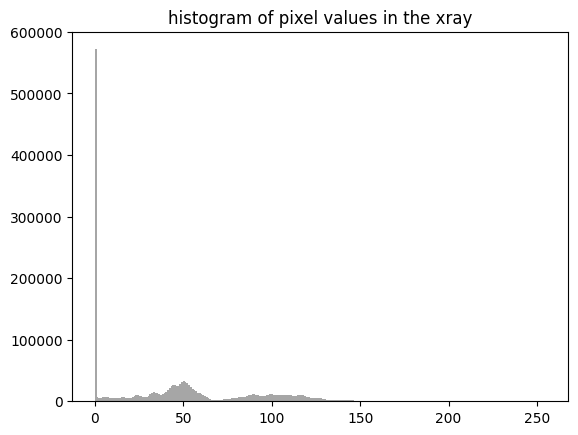

In [10]:
plt.hist(range(256), bins=256, weights=image.convert('L').histogram(), color='gray', alpha=0.7)
plt.title('histogram of pixel values in the xray')
plt.show()

In [35]:
def RGB_to_L(path): # convert RGB images to grayscale 
    for file in sorted(os.listdir(path)):
        image_path = os.path.join(path, file)
        image = Image.open(image_path)
        image = image.convert('L')
        image.save(image_path, 'JPEG')
    print('grayscale conversion done...')

In [37]:
RGB_to_L(train_path)
RGB_to_L(test_path)

grayscale conversion done...
grayscale conversion done...
